In [7]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Lecture notes

- Only symetric matricies have eigenvectors


## Relaxation Method

In [36]:
def f(x):
    return (2 - np.e**x)

In [37]:
mx = 100
x=1.5
for i in range(mx):
    x=f(x)
    print(x)

-2.4816890703380645
1.9163981032154167
-4.796434274236133
1.9917408555495089
-5.328280141440651
1.9951475917041996
-5.353288232146906
1.9952674363818343
-5.354169537413461
1.9952716053777264
-5.354200196979962
1.9952717503460333
-5.35420126310599
1.9952717553869408
-5.354201300177838
1.9952717555622255
-5.354201301466917
1.9952717555683206
-5.354201301511742
1.9952717555685326
-5.354201301513301
1.99527175556854
-5.354201301513355
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.354201301513357
1.9952717555685402
-5.35420130151

In [26]:
def y(x):
    return np.e**(1-(x**2))

In [32]:
x = 0.5
for i in range(10):
    x = f(x)
    print(x)

0.3512787292998718
0.5791166874660032
0.21553850281688325
0.7594702541067504
-0.13714377743039208
1.1281551344941518
-1.0899506950694637
1.6637669287537253
-3.2791596547479474
1.9623401091759864


In [34]:
def g(x):
    return np.sqrt(1-np.log10(x))

In [35]:
x = 0.5
for i in range(10):
    x = g(x)
    print(x)

1.1406270186454384
0.9710079017506411
1.0063683400865293
0.9986205657810124
1.0002997022123024
0.9999349281246053
1.000014130538128
0.9999969316096038
1.000000666293309
0.999999855316284


## Newtown-Raphson

In [40]:
def p(x):
    return (924*(x**6) -2772*(x**5)+ 3150*(x**4) - 1680*(x**3)+420*(x**2)- 42*x+1)

In [41]:
def derriv(p):
    return (924*6*(x**5) -2772*5*(x**4)+ 3150*4*(x**3) - 1680*3*(x**2)+420*2*(x)- 42)

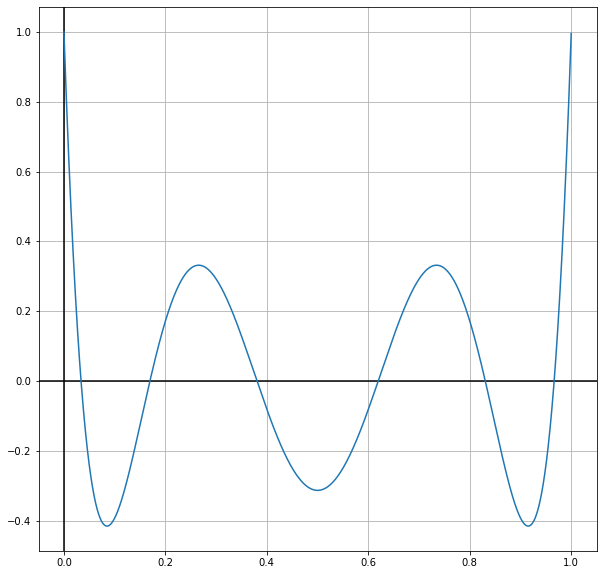

In [51]:
xs = np.arange(0,1,0.0001)
ys = p(xs)
plt.axhline(0, c = 'k')
plt.axvline(0, c = 'k')
plt.plot(xs, ys)
plt.grid();

In [77]:
def xp(guess):
    x = guess
    for i in range(1000):
        x = (x-(p(x)/derriv(x)))
       # print(x)
    return x

In [97]:
x_guess = np.array([0.03,0.17,0.38,0.62,0.83, 0.97])
roots= []
for guess in x_guess:
    root = xp(guess)
    #print('Converge?')
    roots.append(root)

<ipython-input-40-0d2f6e3c0855>:2: RuntimeWarning: overflow encountered in double_scalars
  return (924*(x**6) -2772*(x**5)+ 3150*(x**4) - 1680*(x**3)+420*(x**2)- 42*x+1)


In [83]:
roots

[0.027278380014212057,
 0.16990646157713982,
 0.37991650334208804,
 0.6199255063789244,
 0.8298893941352569,
 0.9684539665051787]

In [98]:
target = 1e-11
err = 1
while err>target:
    delta = p(x_guess)/derriv(x_guess)
    x_guess-= delta
    err = np.max(np.abs(delta))

<ipython-input-40-0d2f6e3c0855>:2: RuntimeWarning: overflow encountered in power
  return (924*(x**6) -2772*(x**5)+ 3150*(x**4) - 1680*(x**3)+420*(x**2)- 42*x+1)


KeyboardInterrupt: 

In [99]:
x_guess

array([      -inf, 0.16939531, 0.16939531, 0.61930959, 0.61930959,
       0.96623476])

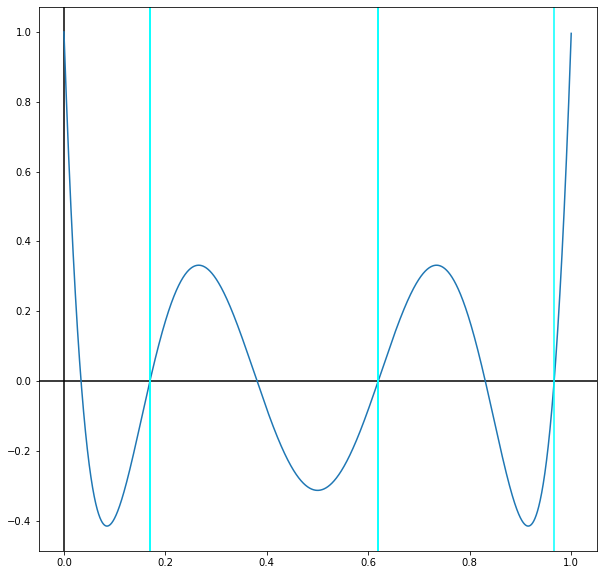

In [100]:
xs = np.arange(0,1,0.0001)
ys = p(xs)
plt.axhline(0, c = 'k')
plt.axvline(0, c = 'k')
plt.plot(xs, ys)
#plt.grid()
for root in x_guess:
    plt.axvline(root, c = 'cyan');

# Secant

In [101]:
def sec_deriv(func, x1, x2):
    return((func(x2)-func(x1))/(x2-x1))